In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDistGeom
from lih import get_collinearity,get_planarity_of_all_rings,check_mols,renumber
#open lih reference set
df = pd.read_csv("lih_set.csv")
mols = [Chem.MolFromSmiles(smi) for smi in df["SMILES"]]
#ETKDG conformers
etkdg_mols = []
for m in mols:
    m = Chem.AddHs(m)
    embed = -1
    k = 0
    while embed<0:
        embed = rdDistGeom.EmbedMolecule(m,randomSeed=123+k)
        k+=1
    etkdg_mols.append(m)
#REFERENCE conformers
ref_mols = []
for m in mols:
    m = Chem.AddHs(m)
    embed = -1
    k = 0
    while embed<0:
        embed = rdDistGeom.EmbedMolecule(m,randomSeed=123+k)
        k+=1
    AllChem.MMFFOptimizeMolecule(m)
    ref_mols.append(m)

In [3]:
etkdg_results = check_mols(etkdg_mols,ref_mols,df)
ref_results = check_mols(ref_mols,ref_mols,df)
#vina conformers
vina_mols = [m for m in Chem.SDMolSupplier("vina_poses.sdf")]
vina_mols2 = [renumber(m,mols[i]) for i,m in enumerate(vina_mols)] # reorder atom idx !!
vina_results = check_mols(vina_mols2,ref_mols,df)
#boltz conformers
boltz_mols = [m for m in Chem.SDMolSupplier("boltz_poses.sdf")]
boltz_mols2 = [renumber(m,mols[i]) for i,m in enumerate(boltz_mols)] # reorder atom idx !!
boltz_results = check_mols(boltz_mols2,ref_mols,df)

remap problem
remap problem


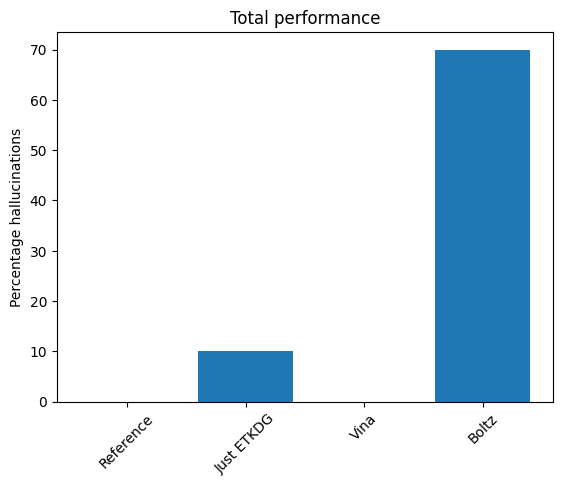

In [4]:
from matplotlib import pyplot as plt

plt.bar(["Reference","Just ETKDG","Vina","Boltz"],[sum(ref_results),sum(etkdg_results),sum(vina_results),sum(boltz_results)])
plt.ylabel("Percentage hallucinations")
plt.title("Total performance")
plt.xticks(rotation=45)
plt.show()